In [1]:
%matplotlib inline

# Yellowbrick Examples 

This notebook is a sample of the examples that yellowbrick provides.

In [2]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import numpy as np 
import pandas as pd
import yellowbrick as yb 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rcParams["figure.figsize"] = (9,6)

## Anscombe's Quartet 

Yellowbrick has learned Anscombe's lesson - which is why we believe that visual diagnostics are vital to machine learning.

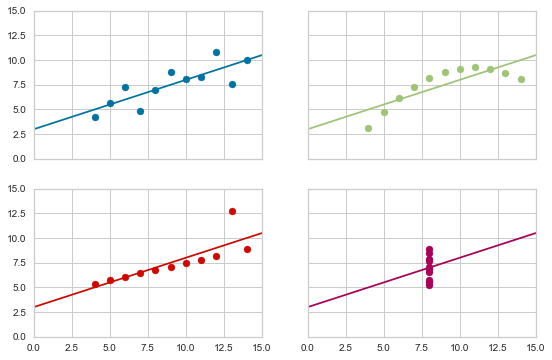

In [3]:
g = yb.anscombe()

## Load Datasets for Example Code

Yellowbrick has provided several datasets wrangled from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/) to present the following examples. If you haven't downloaded the data, you can do so by running:

```
$ python download.py
```

In the same directory as the example notebook. Note that this will create a directory called `data` that contains subdirectories with the given data. 

In [4]:
from download import download_all 

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
    "mushroom": os.path.join(FIXTURES, "mushroom", "mushroom.csv"),
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
        
    
    # Return the data frame
    return pd.read_csv(path)

## Feature Analysis 

Feature analysis visualizers are designed to visualize instances in data space in order to detect features or targets that might impact downstream fitting. Because ML operates on high-dimensional data sets (usually at least 35), the visualizers focus on aggregation, optimization, and other techniques to give overviews of the data. It is our intent that the steering process will allow the data scientist to zoom and filter and explore the relationships between their instances and between dimensions.

At the moment we have three feature analysis visualizers implemented:

- Rank2D: rank pairs of features to detect covariance 
- RadViz: plot data points along axes ordered around a circle to detect separability 
- Parallel Coordinates: plot instances as lines along vertical axes to detect clusters 

Feature analysis visualizers implement the `Transformer` API from Scikit-Learn, meaning they can be used as intermediate transform steps in a `Pipeline` (particularly a `VisualPipeline`). They are instantiated in the same way, and then fit and transform are called on them, which draws the instances correctly. Finally `poof` or `show` is called which displays the image.  

In [5]:
# Feature Analysis Imports 
# NOTE that all these are available for import from the `yellowbrick.features` module 
from yellowbrick.features.rankd import Rank1D, Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer

### Rank Features 

Rank1D and Rank2D evaluate single features or pairs of features using a variety of metrics that score the features on the scale [-1, 1] or [0, 1] allowing them to be ranked. A similar concept to SPLOMs, the scores are visualized on a lower-left triangle heatmap so that patterns between pairs of features can be easily discerned for downstream analysis. 

In [6]:
# Load the classification data set
data = load_data('credit') 

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.default.as_matrix()

#### Rank 1D

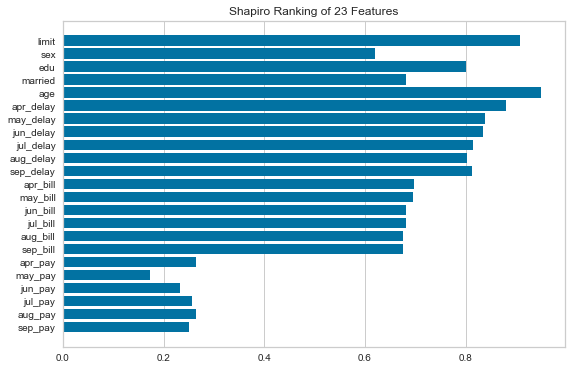

In [7]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

#### Rank2D

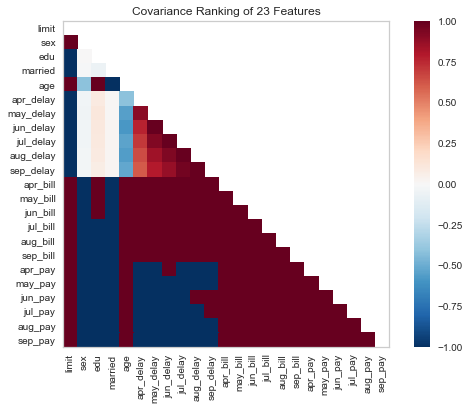

In [8]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

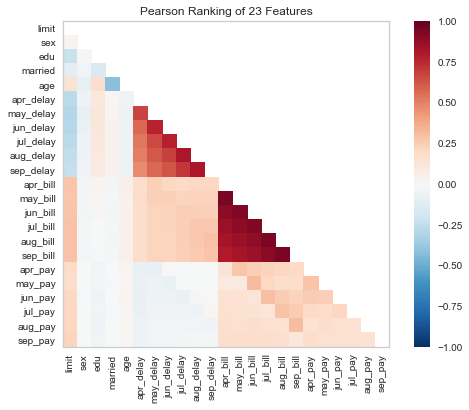

In [9]:
# Instantiate the visualizer with the Pearson ranking algorithm 
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

### RadViz 

RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This mechanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization. 

Data scientists use this method to detect separability between classes. E.g. is there an opportunity to learn from the feature set or is there just too much noise?

In [10]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

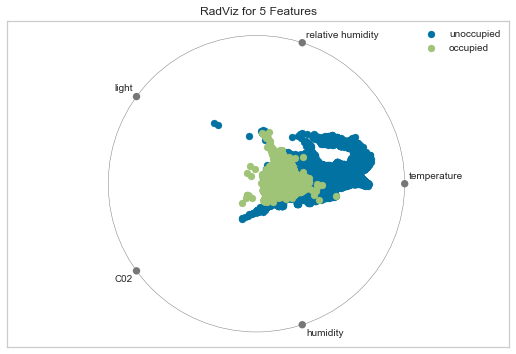

In [11]:
# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

For regression, the RadViz visualizer should use a color sequence to display the target information, as opposed to discrete colors.

### Parallel Coordinates 

Parallel coordinates displays each feature as a vertical axis spaced evenly along the horizontal, and each instance as a line drawn between each individual axis. This allows many dimensions; in fact given infinite horizontal space (e.g. a scrollbar) an infinite number of dimensions can be displayed! 

Data scientists use this method to detect clusters of instances that have similar classes, and to note features that have high variance or different distributions. 

In [12]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

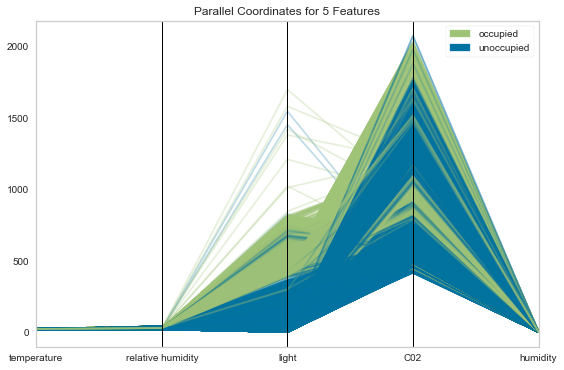

In [13]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

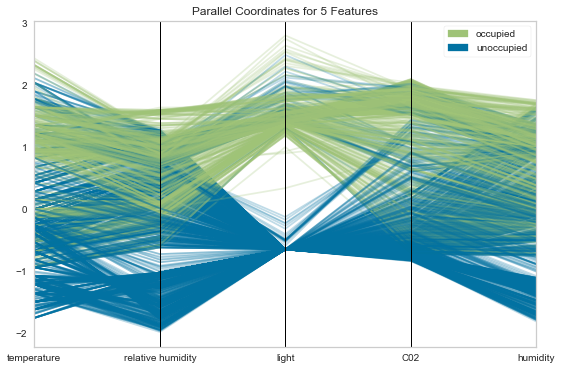

In [14]:
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.1,
)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

### Data Visualization 

The `ScatterVisualizer` and `JointPlotVisualizer` display data for one or two dimensions. 

#### Scatter Visualization

In [15]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features]
y = data.occupancy

/home/kautumn06/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class ScatterVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=DeprecationWarning)


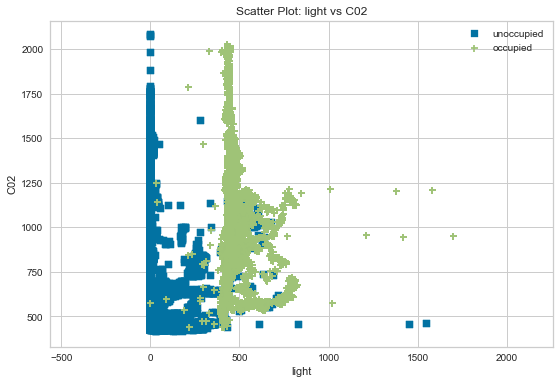

In [16]:
visualizer = ScatterVisualizer(x='light', y='C02', classes=classes)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

#### Joint Plot

In [17]:
# Load the data
df = load_data('concrete')
feature = 'cement'
target = 'strength'

# Get the X and y data from the DataFrame 
X = df[feature]
y = df[target]

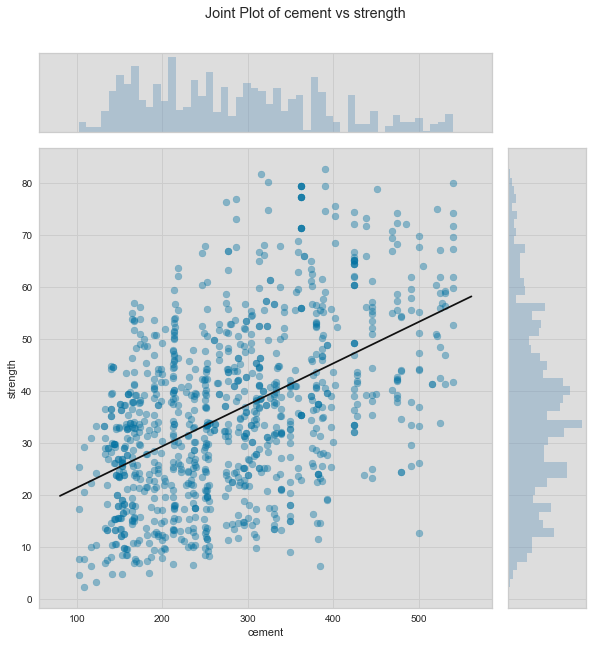

In [18]:
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)
visualizer.poof()

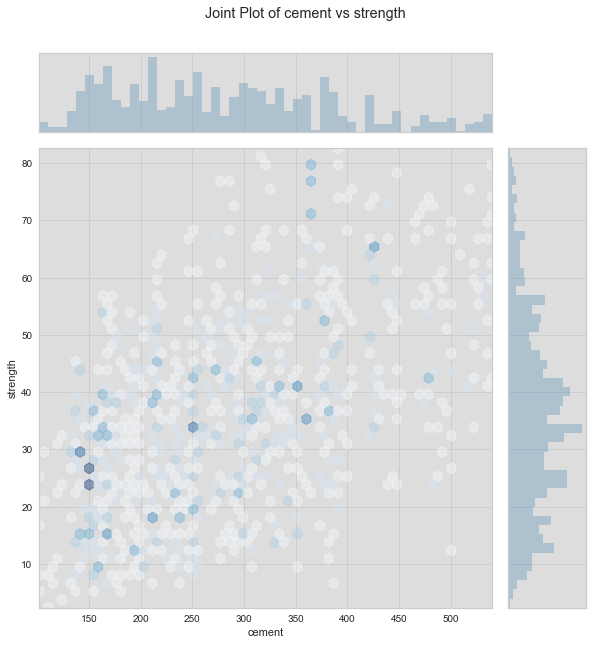

In [19]:
visualizer = JointPlotVisualizer(feature=feature, target=target, joint_plot='hex')

visualizer.fit(X, y)
visualizer.poof()

### Projection 

In [20]:
# Load the classification data set
data = load_data('credit') 

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.default.as_matrix()

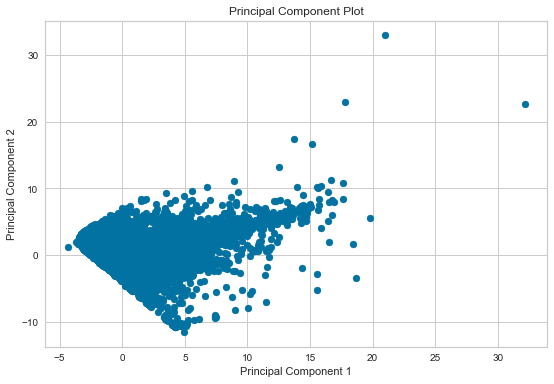

In [21]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

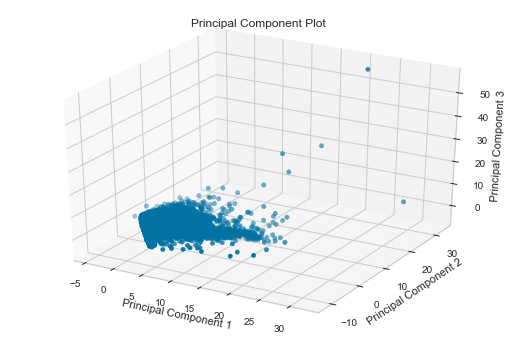

In [22]:
visualizer = PCADecomposition(scale=True, center=False, col=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

## Regressor Evaluation 

The Yellowbrick library is a diagnostic visualization platform for machine learning that allows data scientists to steer the model selection process. It extends the scikit-learn API with a new core object: the Visualizer. Visualizers allow visual models to be fit and transformed as part of the scikit-learn pipeline process, providing visual diagnostics throughout the transformation of high-dimensional data.

Estimator score visualizers *wrap* scikit-learn estimators and expose the Estimator API such that they have `fit()`, `predict()`, and `score()` methods that call the appropriate estimator methods under the hood. Score visualizers can wrap an estimator and be passed in as the final step in a `Pipeline` or `VisualPipeline`.

In machine learning, regression models attempt to predict a target in a continuous space. Yellowbrick has implemented the following regressor score visualizers that display the instances in model space to better understand how the model is making predictions:
- `AlphaSelection`  visual tuning of regularization hyperparameters
- `PredictionError` plot the expected vs. the actual values in model space 
- `Residuals Plot`  plot the difference between the expected and actual values

In [23]:
# Regression Evaluation Imports 
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

#### Load Regression Dataset

Yellowbrick provides several datasets wrangled from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/). For the following examples, we'll use the `concrete` dataset, since it is well-suited for regression tasks.

The `concrete` dataset contains 1030 instances and 9 attributes. Eight of the attributes are explanatory variables, including the age of the concrete and the materials used to create it, while the target variable `strength` is a measure of the concrete's compressive strength (MPa).

In [24]:
# Use Yellowbrick to load the concrete dataset
data = load_concrete()

# Save the data in a Pandas DataFrame
df = pd.DataFrame(data['data'], columns=data['feature_names'], dtype='float')

# Save feature names as a list and target variable as a string
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame 
X = df[feature_names]
y = df[target_name]

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Residuals Plot 

A residual is the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The `ResidualsPlot` Visualizer shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error. 

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually well-suited for the data; otherwise, a non-linear model is more appropriate. The following example shows a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well.

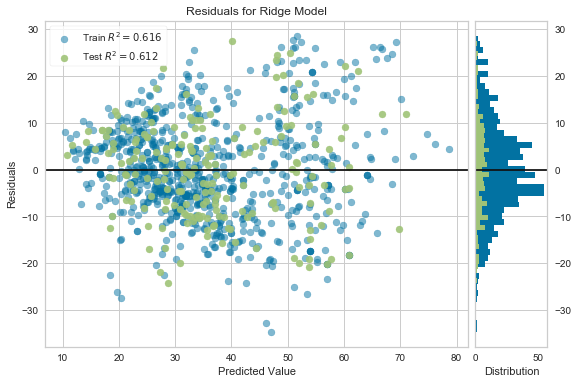

In [25]:
# Instantiate the linear model and visualizer 
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Prediction Error Plot 

Yellowbrick's `PredictionError` Visualizer plots the actual targets from the dataset against the predicted values generated by the model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45-degree line, where the prediction exactly matches the model.

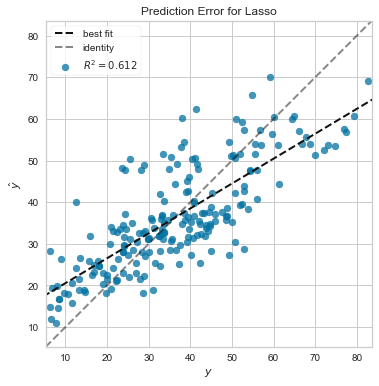

In [26]:
# Instantiate the linear model and visualizer 
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Alpha Selection Visualizer

The `AlphaSelection` Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models. Since regularization is designed to penalize model complexity, the higher the alpha, the less complex the model, decreasing the error due to variance (overfit). However, alphas that are too high increase the error due to bias (underfit). Therefore, it is important to choose an optimal alpha such that the error is minimized in both directions.

To do this, typically you would you use one of the "RegressionCV” models in scikit-learn. E.g. instead of using the `Ridge` (L2) regularizer, use `RidgeCV` and pass a list of alphas, which will be selected based on the cross-validation score of each alpha. This visualizer wraps a “RegressionCV” model and visualizes the alpha/error curve. If the visualization shows a jagged or random plot, then potentially the model is not sensitive to that type of regularization and another is required (e.g. L1 or Lasso regularization).

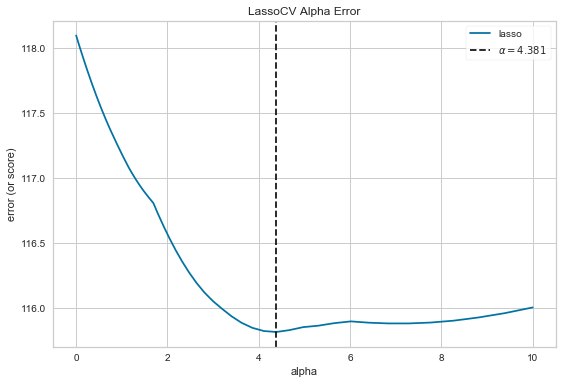

In [27]:
# Create a list of alphas to cross-validate against 
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer 
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X, y)              # Fit the data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data

## Classifier Evaluation 

Classification models attempt to predict a target in a discrete space, that is assign an instance of dependent variables one or more categories. Classification score visualizers display the differences between classes as well as a number of classifier-specific visual evaluations. We currently have implemented three classifier evaluations:

- ClassificationReport: Presents the confusion matrix of the classifier as a heatmap 
- ROCAUC: Presents the graph of receiver operating characteristics along with area under the curve
- ClassBalance:  Displays the difference between the class balances and support 

Estimator score visualizers wrap Scikit-Learn estimators and expose the Estimator API such that they have fit(), predict(), and score() methods that call the appropriate estimator methods under the hood. Score visualizers can wrap an estimator and be passed in as the final step in a Pipeline or VisualPipeline.

In [28]:
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix

### Classification Report 

The classification report visualizer displays the precision, recall, and F1 scores for the model. Integrates numerical scores as well color-coded heatmap in order for easy interpretation and detection. 

In [29]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

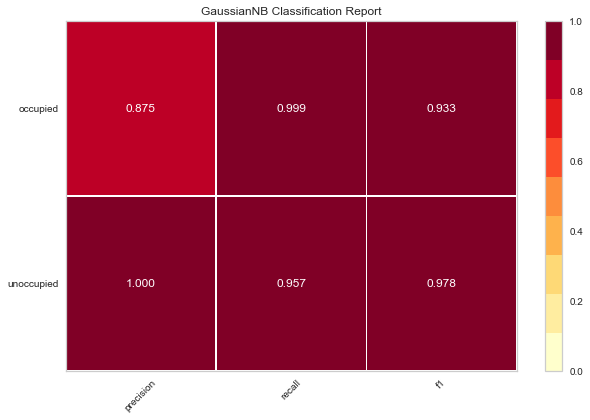

In [30]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Confusion Matrix

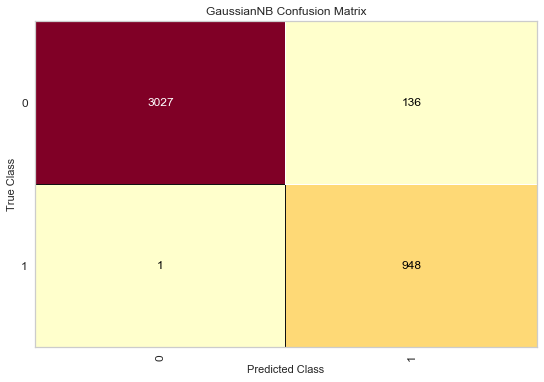

In [31]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ConfusionMatrix(bayes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### ROCAUC 

Plot the ROC to visualize the tradeoff between the classifier's sensitivity and specificity.

In [32]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

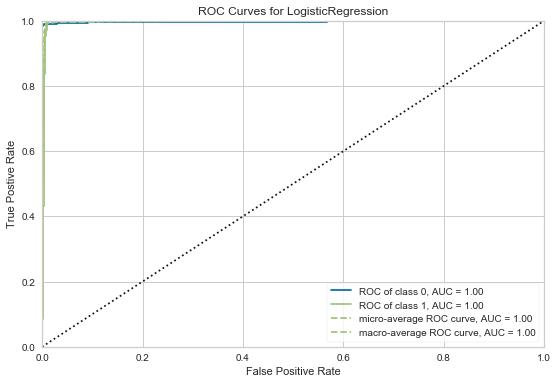

In [33]:
# Instantiate the classification model and visualizer 
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### ClassBalance 

Class balance chart that shows the support for each class in the fitted classification model.

In [34]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

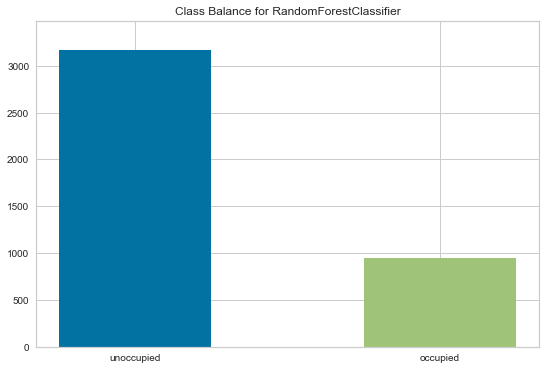

In [35]:
# Instantiate the classification model and visualizer 
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Decision Boundaries 

In [36]:
# # Instantiate the classification model and visualizer 
# forest = RandomForestClassifier()
# visualizer = DecisionBoundariesVisualizer(forest, features=[1,3], classes=classes)

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)
# g = visualizer.poof()             # Draw/show/poof the data

## Clustering Evaluation 

The Yellowbrick library is a diagnostic visualization platform for machine learning that allows data scientists to steer the model selection process. It extends the scikit-learn API with a new core object: the `Visualizer`. Visualizers allow models to be fit and transformed as part of the scikit-learn pipeline process, providing visual diagnostics throughout the transformation of high-dimensional data.

In machine learning, clustering models are unsupervised methods that attempt to detect patterns in unlabeled data. There are two primary classes of clustering algorithms: *agglomerative* clustering which links similar data points together, and *centroidal* clustering which attempts to find centers or partitions in the data.

Currently, Yellowbrick provides two visualizers to evaluate *centroidal* mechanisms, particularly K-Means clustering, that help users discover an optimal $K$ parameter in the clustering metric:
- `KElbowVisualizer`  visualizes the clusters according to a scoring function, looking for an "elbow" in the curve. 
- `SilhouetteVisualizer`  visualizes the silhouette scores of each cluster in a single model.

In [37]:
# Clustering Evaluation Imports 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

### Load the Data

For the following examples, we'll use scikit-learn's `make_blobs()` function to create a sample two-dimensional dataset with 8 random clusters of points.

In [38]:
# Generate synthetic dataset with 8 blobs
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, shuffle=True, random_state=42)

### Elbow Method 

K-Means is a simple unsupervised machine learning algorithm that groups data into the number $K$ of clusters specified by the user, even if it is not the optimal number of clusters for the dataset. 

Yellowbrick's `KElbowVisualizer` implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for $K$. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In the following example, the `KElbowVisualizer` fits the model for a range of $K$ values from 4 to 11, which is set by the parameter `k=(4,12)`. When the model is fit with 8 clusters we can see an "elbow" in the graph, which in this case we know to be the optimal number since we created our synthetic dataset with 8 clusters of points. 

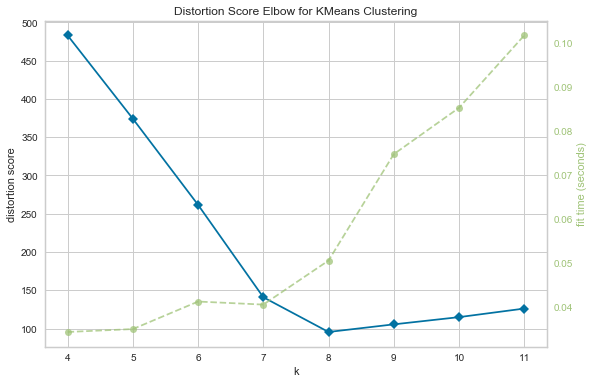

In [39]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

### Silhouette Visualizer 

Silhouette analysis can be used to evaluate the density and separation between clusters. The score is calculated by averaging the silhouette coefficient for each sample, which is computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between -1 and +1, where scores near +1 indicate high separation and scores near -1 indicate that the samples may have been assigned to the wrong cluster.

The `SilhouetteVisualizer` displays the silhouette coefficient for each sample on a per-cluster basis, allowing users to visualize the density and separation of the clusters. This is particularly useful for determining cluster imbalance or for selecting a value for $K$ by comparing multiple visualizers.

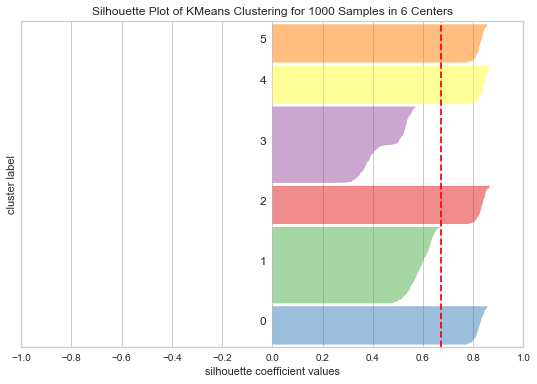

In [40]:
# Instantiate the clustering model and visualizer 
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

## Text Analysis 

Yellowbrick provides the `yellowbrick.text` module for text-specific visualizers. The `TextVisualizer` class specifically deals with datasets that are corpora and not simple numeric arrays or DataFrames, providing utilities for analyzing word distribution, showing document similarity, or simply wrapping some of the other standard visualizers with text-specific display properties. 

### Loading a Text Corpus 

As in the previous sections, Yellowbrick has provided a sample dataset to run the following cells. In particular, we are going to use a text corpus wrangled from the [Baleen RSS Corpus](http://baleen.districtdatalabs.com/) to present the following examples. If you haven't already downloaded the data, you can do so by running:

```
$ python download.py
```

In the same directory as the examples notebook. Note that this will create a directory called `data` that contains subdirectories with the provided datasets.

**NOTE**: If you've already done this from above, you do not have to do it again. 

In [41]:
from download import download_all 
from sklearn.datasets.base import Bunch

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Corpus loading mechanisms
corpora = {
    "hobbies": os.path.join(FIXTURES, "hobbies")
}


def load_corpus(name, download=True):
    """
    Loads and wrangles the passed in text corpus by name.
    If download is specified, this method will download any missing files. 
    
    Note: This function is slightly different to the `load_data` function 
    used above to load pandas dataframes into memory. 
    """
    
    # Get the path from the datasets 
    path = corpora[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
    
    # Read the directories in the directory as the categories. 
    categories = [
        cat for cat in os.listdir(path) 
        if os.path.isdir(os.path.join(path, cat))
    ]
    
    
    files  = [] # holds the file names relative to the root 
    data   = [] # holds the text read from the file 
    target = [] # holds the string of the category 
        
    # Load the data from the files in the corpus 
    for cat in categories:
        for name in os.listdir(os.path.join(path, cat)):
            files.append(os.path.join(path, cat, name))
            target.append(cat)
            
            with open(os.path.join(path, cat, name), 'r') as f:
                data.append(f.read())
        
    
    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

### t-SNE: Corpus Visualization 

One very popular method for visualizing document similarity is to use t-distributed stochastic neighbor embedding, t-SNE. Scikit-Learn implements this decomposition method as the `sklearn.manifold.TSNE` transformer. By decomposing high-dimensional document vectors into 2 dimensions using probability distributions from both the original dimensionality and the decomposed dimensionality, t-SNE is able to effectively cluster similar documents. By decomposing to 2 or 3 dimensions, the documents can be visualized with a scatter plot. 

Unfortunately, `TSNE` is very expensive, so typically a simpler decomposition method such as SVD or PCA is applied ahead of time. The `TSNEVisualizer` creates an inner transformer pipeline that applies such a decomposition first (SVD with 50 components by default), then performs the t-SNE embedding. The visualizer then plots the scatter plot, coloring by cluster or by class, or neither if a structural analysis is required. 

In [42]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Load the data and create document vectors 
corpus = load_corpus('hobbies')
tfidf  = TfidfVectorizer()

docs   = tfidf.fit_transform(corpus.data)
labels = corpus.target 

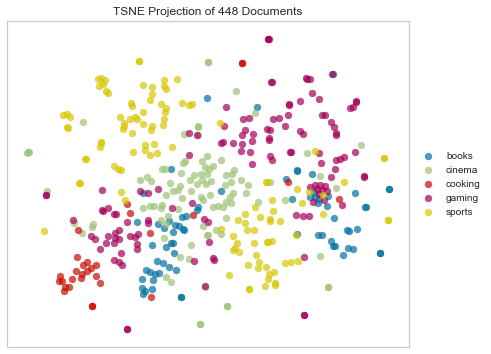

In [44]:
# Create the visualizer and draw the vectors 
tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof()

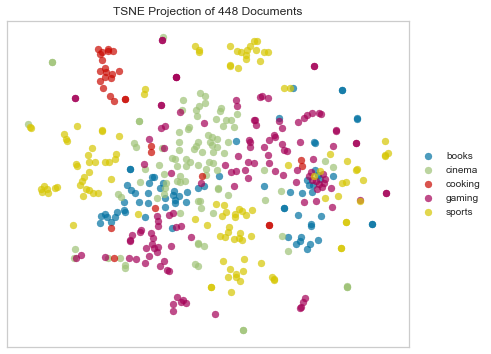

In [45]:
# Only visualize the sports, cinema, and gaming classes 
tsne = TSNEVisualizer(classes=['sports', 'cinema', 'gaming'])
tsne.fit(docs, labels)
tsne.poof()

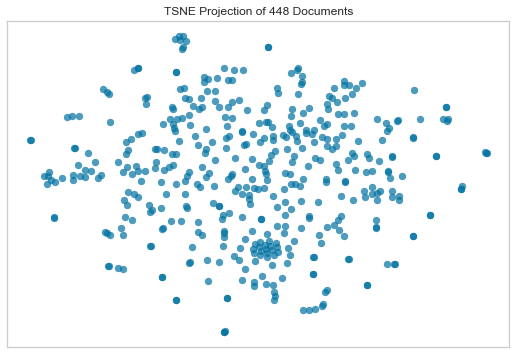

In [46]:
# Don't color points with their classes 
tsne = TSNEVisualizer()
tsne.fit(docs)
tsne.poof()

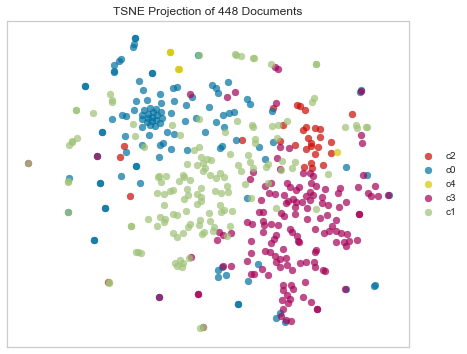

In [47]:
# Apply clustering instead of class names. 
from sklearn.cluster import KMeans 

clusters = KMeans(n_clusters=5)
clusters.fit(docs)

tsne = TSNEVisualizer() 
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()

### Frequency Distribution Visualization 

A method for visualizing the frequency of tokens within and across corpora is frequency distribution. A frequency distribution tells us the frequency of each vocabulary item in the text. In general, it could count any kind of observable event. It is a distribution because it tells us how the total number of word tokens in the text are distributed across the vocabulary items.

In [48]:
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer

Note that the `FreqDistVisualizer` does not perform any normalization or vectorization, and it expects text that has already be count vectorized.

We first instantiate a `FreqDistVisualizer` object, and then call `fit()` on that object with the count vectorized documents and the features (i.e. the words from the corpus), which computes the frequency distribution. The visualizer then plots a bar chart of the top 50 most frequent terms in the corpus, with the terms listed along the x-axis and frequency counts depicted at y-axis values. As with other Yellowbrick visualizers, when the user invokes `poof()`, the finalized visualization is shown.

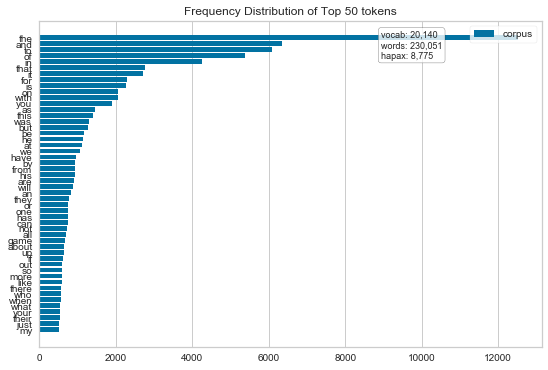

In [49]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

#### Visualizing Stopwords Removal

For example, it is interesting to compare the results of the `FreqDistVisualizer` before and after stopwords have been removed from the corpus:

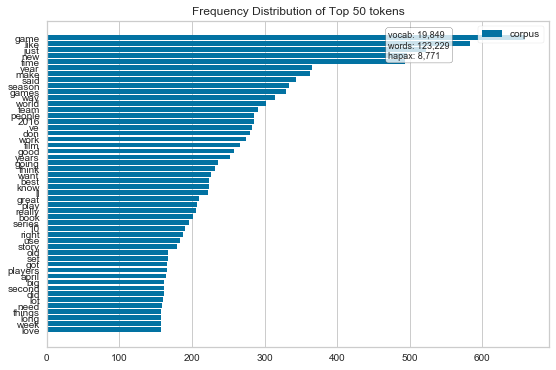

In [50]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

#### Visualizing tokens across corpora

It is also interesting to explore the differences in tokens across a corpus. The hobbies corpus that comes with Yellowbrick has already been categorized (try `corpus['categories']`), so let's visually compare the differences in the frequency distributions for two of the categories: _"cooking"_ and _"gaming"_

In [51]:
hobby_types = {}

for category in corpus['categories']:
    texts = []
    for idx in range(len(corpus['data'])):
        if corpus['target'][idx] == category:
            texts.append(corpus['data'][idx])
    hobby_types[category] = texts

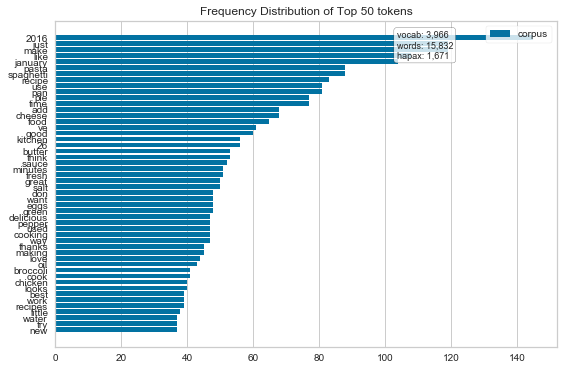

In [52]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text for text in hobby_types['cooking'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

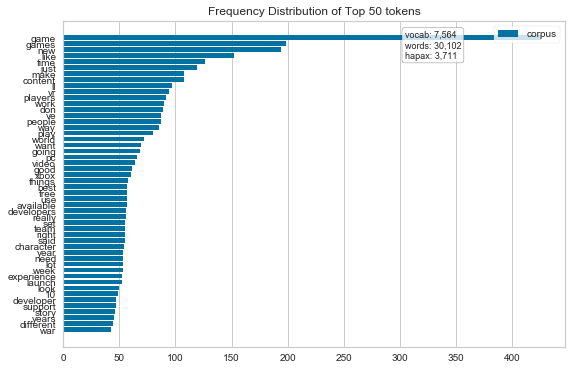

In [53]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text for text in hobby_types['gaming'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()